In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Inputs: Historical data provided to the model in order to make a single forecast.
Outputs: Prediction or forecast for a future time step beyond the data provided as input.



Endogenous: Input variables that are infuenced by other variables in the system and
on which the output variable depends.
 Exogenous: Input variables that are not infuenced by other variables in the system and
on which the output variable depends.

Unstructured: No obvious systematic time-dependent pattern in a time series variable.
 Structured: Systematic time-dependent patterns in a time series variable (eg. trend and/or seasonality).

Univariate: One variable measured over time.
 Multivariate: Multiple variables measured over time.

Univariate and Multivariate Inputs: One or multiple input variables measured over time.
Univariate and Multivariate Outputs: One or multiple output variables to be predicted.

One-step: Forecast the next time step.
 Multi-step: Forecast more than one future time steps.

Static. A forecast model is at once and used to make predictions.
 Dynamic. A forecast model is fit on newly available data prior to each prediction.

Contiguous. Observations are made uniform over time.
Discontiguous. Observations are not uniform over time.

**Define your time series problem**
1. Inputs vs. Outputs: What are the inputs and outputs for a forecast?
2. Endogenous vs. Exogenous: What are the endogenous and exogenous variables?
3. Unstructured vs. Structured: Are the time series variables unstructured or structured?
4. Regression vs. Classification: Are you working on a regression or classification, predictive modeling problem? What are some alternate ways to frame your time series forecasting problem?
5. Univariate vs. Multivariate: Are you working on a univariate or multivariate time series problem?
6. Single-step vs. Multi-step: Do you require a single-step or a multi-step forecast?
7. Static vs. Dynamic: Do you require a static or a dynamically updated model?
8. Contiguous vs. Discontiguous: Are your observations contiguous or discontiguous?

**Design Test Harness**
1. Split the dataset into a train and test set.
2. Fit a candidate approach on the training dataset.
3. Make predictions on the test set directly or using walk-forward validation.
4. Calculate a metric that compares the predictions to the expected values.

**Test Models**
1. Baseline. Simple forecasting methods such as persistence and averages.
2. Autoregression. The Box-Jenkins process and methods such as SARIMA.
3. Exponential Smoothing. Single, double and triple exponential smoothing methods.
4. Linear Machine Learning. Linear regression methods and variants such as regularization.
5. Nonlinear Machine Learning. kNN, decision trees, support vector regression and more.
6. Ensemble Machine Learning. Random forest, gradient boosting, stacking and more.
7. Deep Learning. MLPs, CNNs, LSTMs, and Hybrid models.

***How to Transform Time Series to a Supervised Learning Problem***

**Sliding Window**
We can see that the previous time step is the input (X) and the next time step is the output (y) in our supervised learning problem.

In [2]:
X = [10,20,30,40,50]
Y = []
for i, j in enumerate(X):
  if i < len(X)-1:
    temp = X[i+1]
    Y.append(temp)
X = X[:len(X)-1]
print(X)
print(Y)

[10, 20, 30, 40]
[20, 30, 40, 50]


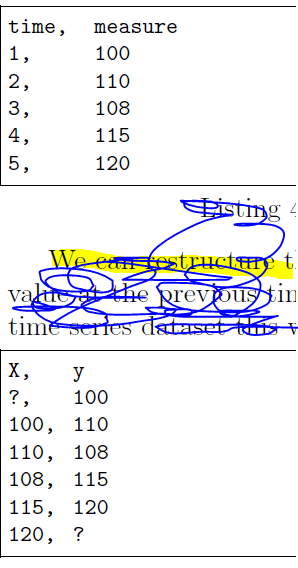

**Sliding Window With Multiple Variates**

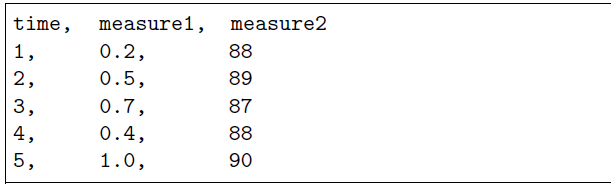

Predict measure 2

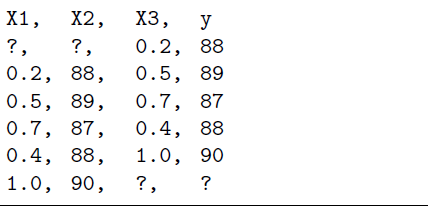

Predict both measure 1 and measure 2

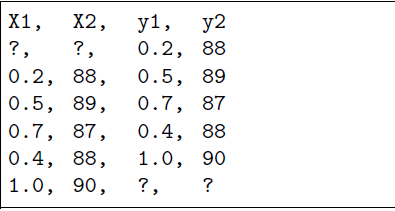

**Sliding Window With Multiple Steps**

One-step Forecast: This is where the next time step (t+1) is predicted.
 Multi-step Forecast: This is where two or more future time steps are to be predicted.

** 2 Step Forcasting**

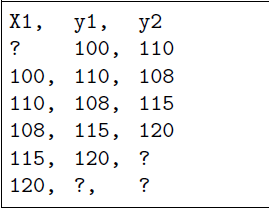

**How to Prepare Time Series Data for CNNs and LSTMs**

In [3]:
import numpy as np
data = [1,2,3,4,5,6,7,8,9,10]
data

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

**y = f(X)**

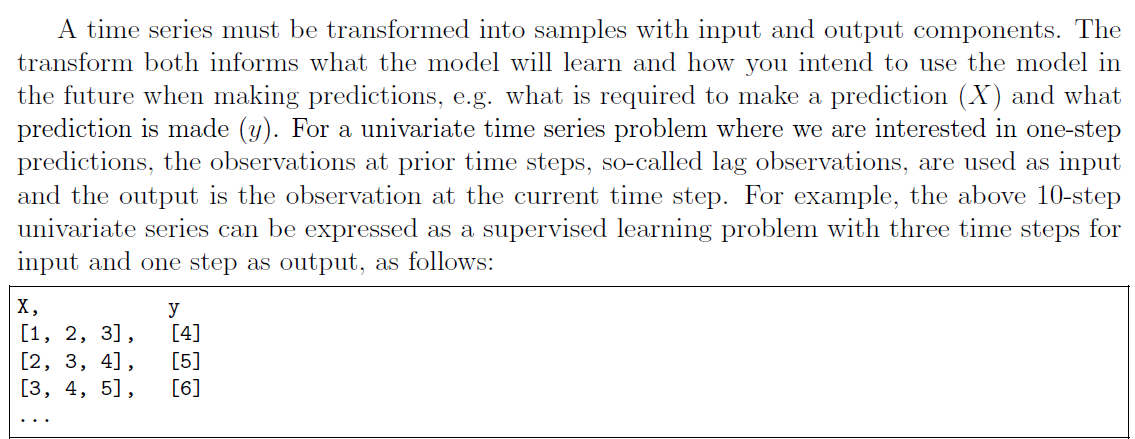

In [4]:
# Function
import numpy as np
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
  X, y = list(), list()
  for i in range(len(sequence)):
    # find the end of this pattern
    end_ix = i + n_steps
    # check if we are beyond the sequence
    if end_ix > len(sequence)-1:
      break
    # gather input and output parts of the pattern
    seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
    X.append(seq_x)
    y.append(seq_y)
  return np.array(X), np.array(y)


In [5]:
X, y = split_sequence(data, 3)
print(X)
print(y)

[[1 2 3]
 [2 3 4]
 [3 4 5]
 [4 5 6]
 [5 6 7]
 [6 7 8]
 [7 8 9]]
[ 4  5  6  7  8  9 10]


In [6]:
# Each list in X are the features say x1, x2, x3 if steps = 3

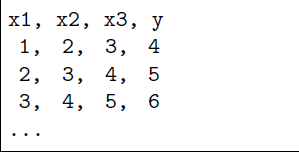

In [7]:
# define univariate time series
from numpy import array
series = array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
print(series.shape)
# transform to a supervised learning problem
X, y = split_sequence(series, 3)
print(X.shape, y.shape)
# show each sample
for i in range(len(X)):
  print(X[i], y[i])

(10,)
(7, 3) (7,)
[1 2 3] 4
[2 3 4] 5
[3 4 5] 6
[4 5 6] 7
[5 6 7] 8
[6 7 8] 9
[7 8 9] 10


**3D Data Preparation Basics**


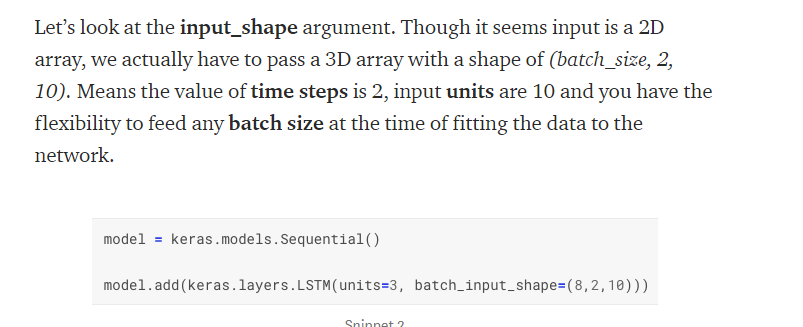

The input layer for CNN and LSTM models is specified by the input shape argument on the first hidden layer of the network.

The input to every CNN and LSTM layer must be three-dimensional. The three dimensions of this input are:
1. Samples. One sequence is one sample. A batch is comprised of one or more samples.
2. Time Steps. One time step is one point of observation in the sample. One sample is comprised of multiple time steps.
3. Features. One feature is one observation at a time step. One time step is comprised of one or more features.

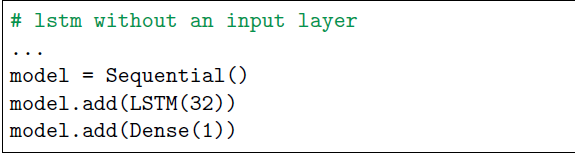

In [ ]:
# [samples, timesteps (number of observations at a given time), features (no of variables, for univariate case it is always 1)].

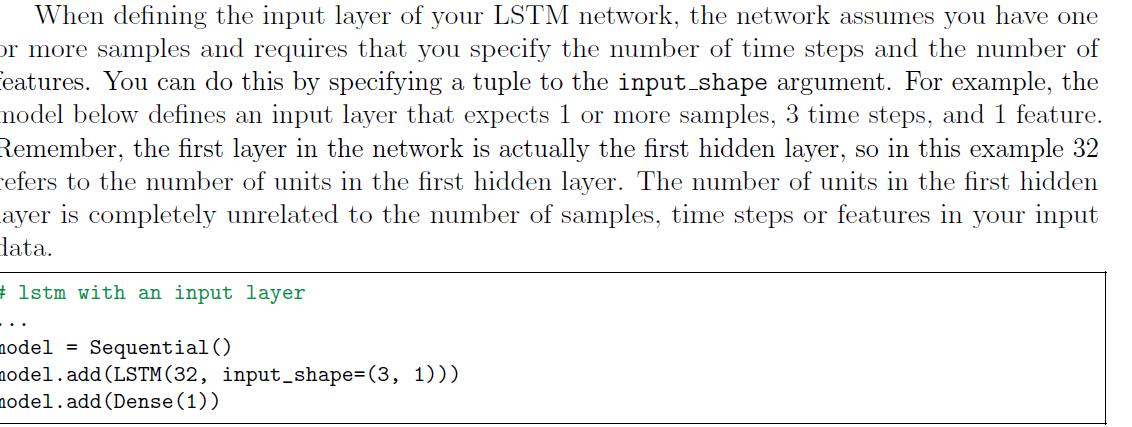

In [8]:
# reshape using numpy

# transform input from [samples, features] to [samples, timesteps, features]
# X = X.reshape((7, 3, 1))



# transform input from [samples, features] to [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))
X

array([[[1],
        [2],
        [3]],

       [[2],
        [3],
        [4]],

       [[3],
        [4],
        [5]],

       [[4],
        [5],
        [6]],

       [[5],
        [6],
        [7]],

       [[6],
        [7],
        [8]],

       [[7],
        [8],
        [9]]])

In [9]:
# define univariate time series
series = array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
print(series.shape)
# transform to a supervised learning problem
X, y = split_sequence(series, 3)
print(X.shape, y.shape)
# transform input from [samples, features] to [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))
print(X.shape)

(10,)
(7, 3) (7,)
(7, 3, 1)


**We have two columns in data file with 5000 rows, column 1 is time (with 1 hour interval) and column 2 is the number of sales and we are trying to forecast the number of sales for future time steps**

 Sequence Length. LSTMs don't like sequences of more than 200-400 time steps, so the data will need to be split into subsamples.
We will work through this example, broken down into the following 4 steps:
1. Load the Data
2. Drop the Time Column
3. Split Into Samples
4. Reshape Subsequences

In [10]:
#Example

# example of defining a dataset
from numpy import array
# define the dataset
data = list()
n = 5000
for i in range(n):
  data.append([i+1, (i+1)*10])
data = array(data)
print(data[:5, :])
print(data.shape)

[[ 1 10]
 [ 2 20]
 [ 3 30]
 [ 4 40]
 [ 5 50]]
(5000, 2)


In [11]:
# example of dropping the time dimension from the dataset
from numpy import array
# define the dataset
data = list()
n = 5000
for i in range(n):
  data.append([i+1, (i+1)*10])
data = array(data)
# drop time
data = data[:, 1]
print(data.shape)

(5000,)


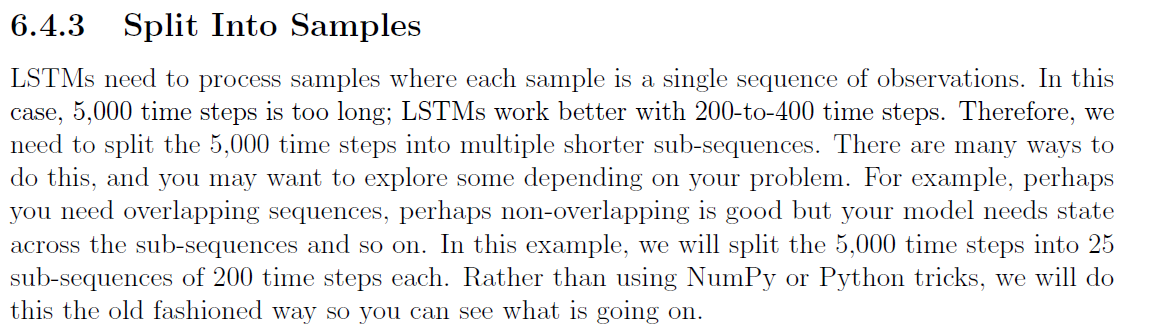

In [12]:
# example of splitting a univariate sequence into subsequences
from numpy import array
# define the dataset
data = list()
n = 5000
for i in range(n):
  data.append([i+1, (i+1)*10])
data = array(data)
# drop time
data = data[:, 1]
# split into samples (e.g. 5000/200 = 25)
samples = list()
length = 200
# step over the 5,000 in jumps of 200
for i in range(0,n,length):
  # grab from i to i + 200
  sample = data[i:i+length]
  samples.append(sample)
print(len(samples))

25


**Reshape Subsequences**
The LSTM needs data with the format of [samples, timesteps, features]. We have 25
samples, 200 time steps per sample, and 1 feature. First, we need to convert our list of arrays
into a 2D NumPy array with the shape [25, 200].

In [13]:
# example of creating an array of subsequence
from numpy import array
# define the dataset
data = list()
n = 5000
for i in range(n):
  data.append([i+1, (i+1)*10])
data = array(data)
# drop time
data = data[:, 1]
# split into samples (e.g. 5000/200 = 25)
samples = list()
length = 200
# step over the 5,000 in jumps of 200
for i in range(0,n,length):
  # grab from i to i + 200
  sample = data[i:i+length]
  samples.append(sample)
# convert list of arrays into 2d array
data = array(samples)
print(data.shape)

# reshape into [samples, timesteps, features]
data = data.reshape((len(samples), length, 1))
print(data.shape)

(25, 200)
(25, 200, 1)


**How to Develop MLPs for Time Series Forecasting**

In [14]:
# univariate mlp example
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
  X, y = list(), list()

  for i in range(len(sequence)):
    # find the end of this pattern
    end_ix = i + n_steps
    # check if we are beyond the sequence
    if end_ix > len(sequence)-1:
      break
    # gather input and output parts of the pattern
    seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
    X.append(seq_x)
    y.append(seq_y)
  return array(X), array(y)

# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# define model
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=n_steps))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=2000, verbose=0)
# demonstrate prediction
x_input = array([70, 80, 90])
x_input = x_input.reshape((1, n_steps))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[100.18821]]


**Multivariate MLP Models**

Multivariate time series data means data where there is more than one observation for each time step. There are two main models that we may require with multivariate time series data; they are:

1. Multiple Input Series.
2. Multiple Parallel Series.

**Multiple Input Series**

A problem may have two or more parallel input time series and an output time series that is
dependent on the input time series. The input time series are parallel because each series has
an observation at the same time step

In [15]:
# multivariate data preparation
from numpy import array
from numpy import hstack
# define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))
print(dataset)

[[ 10  15  25]
 [ 20  25  45]
 [ 30  35  65]
 [ 40  45  85]
 [ 50  55 105]
 [ 60  65 125]
 [ 70  75 145]
 [ 80  85 165]
 [ 90  95 185]]


In [16]:
# multivariate data preparation
from numpy import array
from numpy import hstack
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
  X, y = list(), list()
  for i in range(len(sequences)):
    # find the end of this pattern
    end_ix = i + n_steps
    # check if we are beyond the dataset
    if end_ix > len(sequences):
      break
    # gather input and output parts of the pattern
    seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
    X.append(seq_x)
    y.append(seq_y)
  return array(X), array(y)
# define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))
# choose a number of time steps
n_steps = 3
# convert into input/output
X, y = split_sequences(dataset, n_steps)
print(X.shape, y.shape)

# summarize the data
for i in range(len(X)):
  print(X[i], y[i])

(7, 3, 2) (7,)
[[10 15]
 [20 25]
 [30 35]] 65
[[20 25]
 [30 35]
 [40 45]] 85
[[30 35]
 [40 45]
 [50 55]] 105
[[40 45]
 [50 55]
 [60 65]] 125
[[50 55]
 [60 65]
 [70 75]] 145
[[60 65]
 [70 75]
 [80 85]] 165
[[70 75]
 [80 85]
 [90 95]] 185


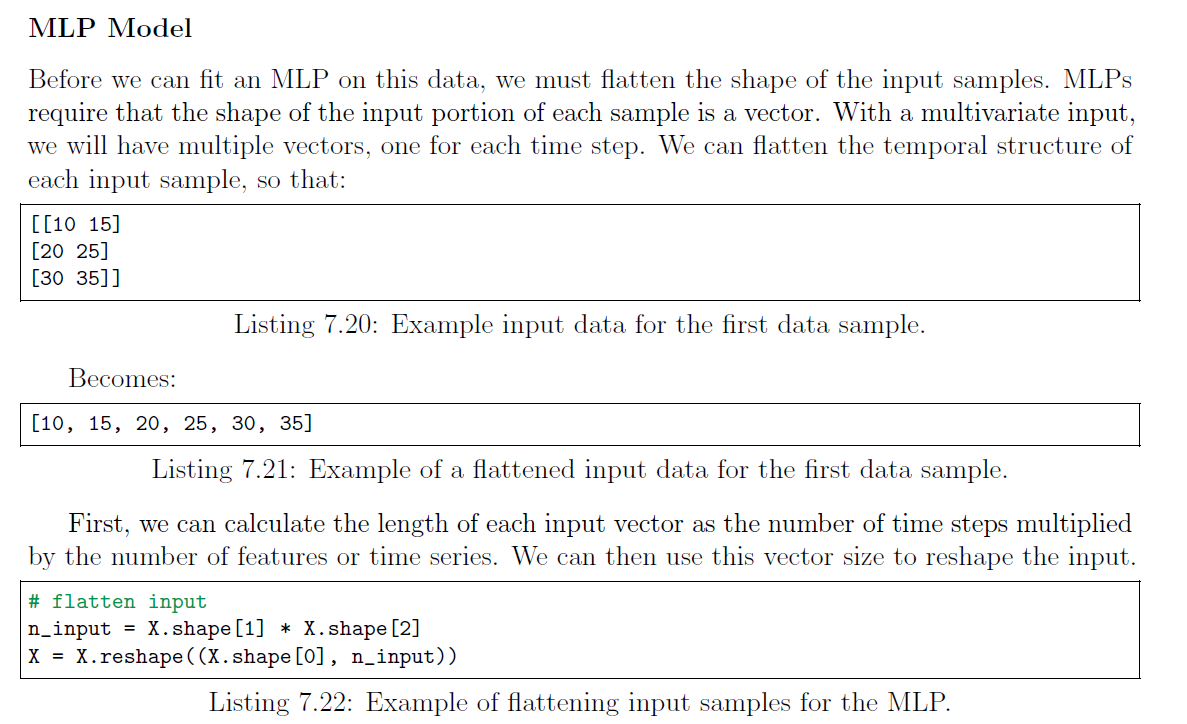

In [17]:
# multivariate mlp example
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import Dense
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
  X, y = list(), list()
  for i in range(len(sequences)):
    # find the end of this pattern
    end_ix = i + n_steps
    # check if we are beyond the dataset
    if end_ix > len(sequences):
      break
    # gather input and output parts of the pattern
    seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
    X.append(seq_x)
    y.append(seq_y)
  return array(X), array(y)
# define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])

out_seq = array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))
# choose a number of time steps
n_steps = 3
# convert into input/output
X, y = split_sequences(dataset, n_steps)
# flatten input
n_input = X.shape[1] * X.shape[2]
X = X.reshape((X.shape[0], n_input))
# define model
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=n_input))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=2000, verbose=0)
# demonstrate prediction
x_input = array([[80, 85], [90, 95], [100, 105]])
x_input = x_input.reshape((1, n_input))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[206.6604]]
